<a href="https://colab.research.google.com/github/Khanhthao/IS353.Q11/blob/main/Code_GNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chạy code GNP của tác giả** *(nhưng không thành công)*

In [10]:
!git clone https://github.com/amazon-science/GNP.git
%cd GNP
!pip install -r requirements.txt
!rm -rf data/medqa
!rm -rf data/glove
!rm -rf data/riddle
!rm -rf data/csqa
!rm -rf data/umls

# Verify that only obqa and cpnet remain
!ls -R data


Cloning into 'GNP'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 186 (delta 115), reused 145 (delta 91), pack-reused 0 (from 0)
Receiving objects: 100% (186/186), 697.61 KiB | 6.23 MiB/s, done.
Resolving deltas: 100% (115/115), done.
/content/GNP/GNP
  Using cached accelerate-0.20.3-py3-none-any.whl.metadata (17 kB)
  Using cached aiohttp-3.8.4.tar.gz (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached aioitertools-0.11.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached anykeystore-0.2.tar.gz (10 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached apex-0.9.10dev.tar.gz (36 kB)
  Installing build dependencies 

In [3]:
!wget https://nlp.stanford.edu/projects/myasu/DRAGON/data_preprocessed.zip
!unzip data_preprocessed.zip
!mv data_preprocessed data

--2025-12-17 12:22:33--  https://nlp.stanford.edu/projects/myasu/DRAGON/data_preprocessed.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6097668041 (5.7G) [application/zip]
Saving to: ‘data_preprocessed.zip’

data_preprocessed.z 100%[===================>]   5.68G  9.85MB/s    in 7m 26s  

2025-12-17 12:30:00 (13.0 MB/s) - ‘data_preprocessed.zip’ saved [6097668041/6097668041]

Archive:  data_preprocessed.zip
   creating: data_preprocessed/
   creating: data_preprocessed/medqa/
   creating: data_preprocessed/medqa/graph/
  inflating: data_preprocessed/medqa/graph/test.graph.adj.pk  
  inflating: data_preprocessed/medqa/graph/train.graph.adj.pk-nodenum200.loaded_cache  
  inflating: data_preprocessed/medqa/graph/train.graph.adj.pk  
  inflating: data_preprocessed/medqa/graph/dev.graph.adj.pk  
  inflating: data_preprocessed/medqa/gra

**Logistic Regression / Linear Classifier trên BoW**

In [15]:
def load_obqa_split(split):
    path = f"/content/GNP/data/obqa/OpenBookQA-V1-Sep2018/Data/Main/{split}.jsonl"
    with open(path, "r") as f:
        lines = f.readlines()
    questions, labels = [], []
    for line in lines:
        item = json.loads(line)
        q = item["question"]["stem"]
        choices = [f"({c['label']}) {c['text']}" for c in item["question"]["choices"]]
        input_text = q + " Options: " + " ".join(choices)
        questions.append(input_text)
        labels.append(item["answerKey"])
    return questions, labels


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import json

train_q, train_y = load_obqa_split("train")
val_q, val_y     = load_obqa_split("dev")
test_q, test_y   = load_obqa_split("test")

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_q)
X_val   = vectorizer.transform(val_q)
X_test  = vectorizer.transform(test_q)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, train_y)

val_pred = clf.predict(X_val)
test_pred = clf.predict(X_test)

print("Validation accuracy:", accuracy_score(val_y, val_pred))
print("Test accuracy:", accuracy_score(test_y, test_pred))

Validation accuracy: 0.264
Test accuracy: 0.248


In [17]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print("\n--- Validation Set Metrics ---")
print(f"Validation Precision: {precision_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation Recall: {recall_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation F1-score: {f1_score(val_y, val_pred, average='weighted'):.4f}")
print("\nValidation Classification Report:")
print(classification_report(val_y, val_pred))

print("\n--- Test Set Metrics ---")
print(f"Test Precision: {precision_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test F1-score: {f1_score(test_y, test_pred, average='weighted'):.4f}")
print("\nTest Classification Report:")
print(classification_report(test_y, test_pred))


--- Validation Set Metrics ---
Validation Precision: 0.2657
Validation Recall: 0.2640
Validation F1-score: 0.2605

Validation Classification Report:
              precision    recall  f1-score   support

           A       0.25      0.37      0.29       126
           B       0.32      0.28      0.30       138
           C       0.21      0.16      0.19       110
           D       0.27      0.24      0.25       126

    accuracy                           0.26       500
   macro avg       0.26      0.26      0.26       500
weighted avg       0.27      0.26      0.26       500


--- Test Set Metrics ---
Test Precision: 0.2471
Test Recall: 0.2480
Test F1-score: 0.2439

Test Classification Report:
              precision    recall  f1-score   support

           A       0.25      0.33      0.28       138
           B       0.23      0.18      0.20       126
           C       0.25      0.19      0.22       132
           D       0.27      0.29      0.28       104

    accuracy           

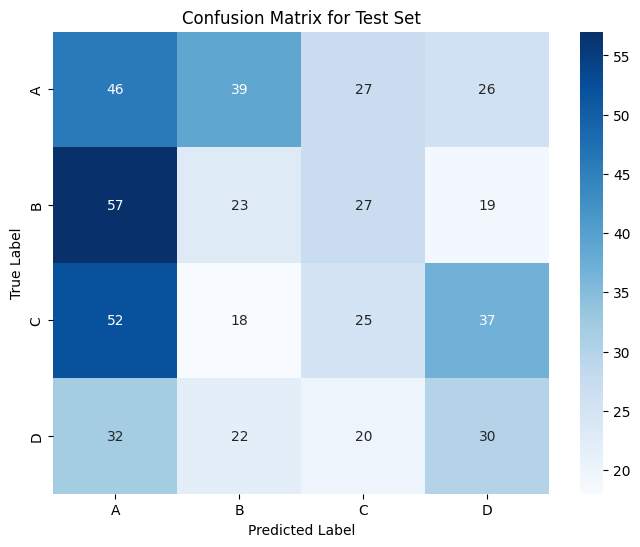

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for the test set
cm = confusion_matrix(test_y, test_pred, labels=['A', 'B', 'C', 'D'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

**SVM cho OBQA**

In [19]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Hàm load dữ liệu OBQA
def load_obqa_split(split):
    path = f"/content/GNP/data/obqa/OpenBookQA-V1-Sep2018/Data/Main/{split}.jsonl"
    with open(path, "r") as f:
        lines = f.readlines()
    questions, labels = [], []
    for line in lines:
        item = json.loads(line)
        q = item["question"]["stem"]
        choices = [f"({c['label']}) {c['text']}" for c in item["question"]["choices"]]
        input_text = q + " Options: " + " ".join(choices)
        questions.append(input_text)
        labels.append(item["answerKey"])
    return questions, labels

# Load train/dev/test
train_q, train_y = load_obqa_split("train")
val_q, val_y     = load_obqa_split("dev")
test_q, test_y   = load_obqa_split("test")

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_q)
X_val   = vectorizer.transform(val_q)
X_test  = vectorizer.transform(test_q)

# SVM classifier
clf = LinearSVC(max_iter=2000)
clf.fit(X_train, train_y)

# Predict
val_pred = clf.predict(X_val)
test_pred = clf.predict(X_test)

# Accuracy
print("Validation accuracy:", accuracy_score(val_y, val_pred))
print("Test accuracy:", accuracy_score(test_y, test_pred))


Validation accuracy: 0.264
Test accuracy: 0.254


In [20]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print("\n--- Validation Set Metrics ---")
print(f"Validation Precision: {precision_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation Recall: {recall_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation F1-score: {f1_score(val_y, val_pred, average='weighted'):.4f}")
print("\nValidation Classification Report:")
print(classification_report(val_y, val_pred))

print("\n--- Test Set Metrics ---")
print(f"Test Precision: {precision_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test F1-score: {f1_score(test_y, test_pred, average='weighted'):.4f}")
print("\nTest Classification Report:")
print(classification_report(test_y, test_pred))


--- Validation Set Metrics ---
Validation Precision: 0.2660
Validation Recall: 0.2640
Validation F1-score: 0.2646

Validation Classification Report:
              precision    recall  f1-score   support

           A       0.23      0.26      0.25       126
           B       0.30      0.28      0.29       138
           C       0.23      0.23      0.23       110
           D       0.29      0.29      0.29       126

    accuracy                           0.26       500
   macro avg       0.26      0.26      0.26       500
weighted avg       0.27      0.26      0.26       500


--- Test Set Metrics ---
Test Precision: 0.2574
Test Recall: 0.2540
Test F1-score: 0.2546

Test Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.28      0.27       138
           B       0.22      0.21      0.22       126
           C       0.31      0.26      0.28       132
           D       0.23      0.27      0.25       104

    accuracy           

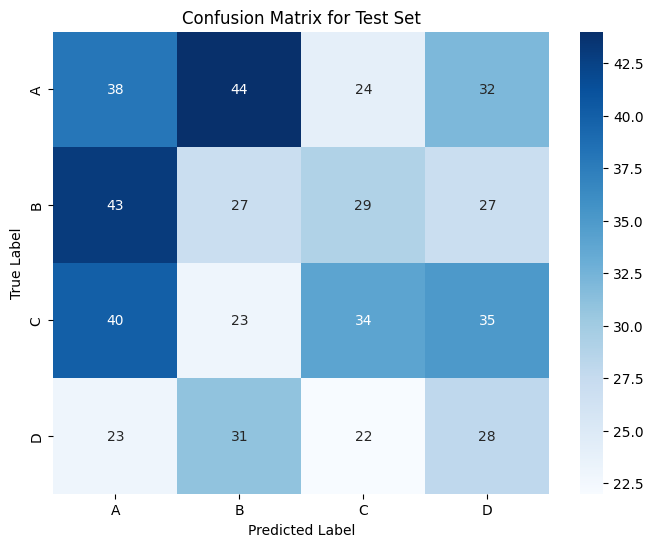

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for the test set
cm = confusion_matrix(test_y, test_pred, labels=['A', 'B', 'C', 'D'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

**Naive Bayes**

In [22]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# ===== Load dataset =====
def load_obqa(split):
    path = f"/content/GNP/data/obqa/OpenBookQA-V1-Sep2018/Data/Main/{split}.jsonl"
    texts, labels = [], []
    label_map = {"A":0,"B":1,"C":2,"D":3}
    with open(path, "r") as f:
        for line in f:
            item = json.loads(line)
            q = item["question"]["stem"]
            choices = item["question"]["choices"]
            answer = label_map[item["answerKey"]]
            # tạo sample cho mỗi đáp án
            for i, c in enumerate(choices):
                text = q + " " + c["text"]
                texts.append(text)
                labels.append(i)   # nhãn là 0,1,2,3
    return texts, labels

train_texts, train_labels = load_obqa("train")
val_texts, val_labels     = load_obqa("dev")
test_texts, test_labels   = load_obqa("test")

# ===== Build pipeline =====
clf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("nb", MultinomialNB())
])

# ===== Train =====
clf.fit(train_texts, train_labels)

# ===== Evaluate =====
val_preds = clf.predict(val_texts)
test_preds = clf.predict(test_texts)

print("Validation Accuracy:", accuracy_score(val_labels, val_preds))
print("Test Accuracy:", accuracy_score(test_labels, test_preds))


Validation Accuracy: 0.261
Test Accuracy: 0.2525


In [23]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print("\n--- Validation Set Metrics ---")
print(f"Validation Precision: {precision_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation Recall: {recall_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation F1-score: {f1_score(val_y, val_pred, average='weighted'):.4f}")
print("\nValidation Classification Report:")
print(classification_report(val_y, val_pred))

print("\n--- Test Set Metrics ---")
print(f"Test Precision: {precision_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test F1-score: {f1_score(test_y, test_pred, average='weighted'):.4f}")
print("\nTest Classification Report:")
print(classification_report(test_y, test_pred))


--- Validation Set Metrics ---
Validation Precision: 0.2660
Validation Recall: 0.2640
Validation F1-score: 0.2646

Validation Classification Report:
              precision    recall  f1-score   support

           A       0.23      0.26      0.25       126
           B       0.30      0.28      0.29       138
           C       0.23      0.23      0.23       110
           D       0.29      0.29      0.29       126

    accuracy                           0.26       500
   macro avg       0.26      0.26      0.26       500
weighted avg       0.27      0.26      0.26       500


--- Test Set Metrics ---
Test Precision: 0.2574
Test Recall: 0.2540
Test F1-score: 0.2546

Test Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.28      0.27       138
           B       0.22      0.21      0.22       126
           C       0.31      0.26      0.28       132
           D       0.23      0.27      0.25       104

    accuracy           

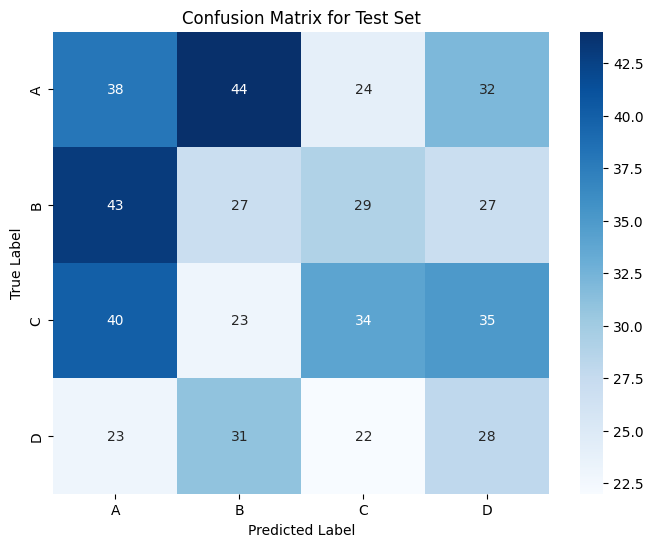

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for the test set
cm = confusion_matrix(test_y, test_pred, labels=['A', 'B', 'C', 'D'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

**RoBERTa baseline**

In [9]:
!pip install tokenizers==0.13.3
!pip install transformers==4.29.1
from transformers import AutoTokenizer, AutoModelForMultipleChoice, TrainingArguments, Trainer
import torch
import json
from datasets import Dataset

# ===== Load OpenBookQA =====
def load_obqa_mc(split):
    # Correct path for obqa data after cleaning
    path = f"/content/GNP/data/obqa/OpenBookQA-V1-Sep2018/Data/Main/{split}.jsonl"
    label_map = {"A":0,"B":1,"C":2,"D":3}
    data = {"input": [], "label": []}
    with open(path, "r") as f:
        for line in f:
            item = json.loads(line)
            q = item["question"]["stem"]
            choices = item["question"]["choices"]
            label = label_map[item["answerKey"]]
            inputs = [q + " " + c["text"] for c in choices]
            data["input"].append(inputs)
            data["label"].append(label)
    return Dataset.from_dict(data)

train_ds = load_obqa_mc("train")
val_ds   = load_obqa_mc("dev")

# ===== Tokenizer =====
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

def preprocess(examples):
    all_input_ids = []
    all_attention_mask = []

    for question_choices in examples["input"]:
        tokenized_output = tokenizer(
            question_choices,
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )
        all_input_ids.append(tokenized_output["input_ids"])
        all_attention_mask.append(tokenized_output["attention_mask"])

    input_ids_stacked = torch.stack(all_input_ids)
    attention_mask_stacked = torch.stack(all_attention_mask)

    tokenized_inputs = {
        "input_ids": input_ids_stacked,
        "attention_mask": attention_mask_stacked,
        "labels": torch.tensor(examples["label"])
    }
    return tokenized_inputs

train_ds = train_ds.map(preprocess, batched=True)
val_ds   = val_ds.map(preprocess, batched=True)

# ===== Model =====
model = AutoModelForMultipleChoice.from_pretrained("roberta-base")

# ===== Training Arguments =====
args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,   # tăng tốc độ huấn luyện
    num_train_epochs=3,             # ví dụ chạy 3 epoch để nhanh hơn
    weight_decay=0.01,
    report_to=[],
    fp16=True                         # dùng mixed precision nếu GPU hỗ trợ
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
)

# ===== Training Loop: chỉ evaluate mỗi 50 epoch =====
for epoch in range(args.num_train_epochs):
    print(f"\n===== Epoch {epoch+1}/{args.num_train_epochs} =====")
    trainer.train()
    if (epoch + 1) % 50 == 0:
        print(f"--- Evaluation at epoch {epoch+1} ---")
        metrics = trainer.evaluate()
        print(metrics)

# Get predictions and true labels for validation set
val_predictions = trainer.predict(val_ds)
val_pred = val_predictions.predictions.argmax(axis=1)
val_y = val_ds["labels"]

# For simplicity, assuming test_ds is similar to val_ds if not explicitly loaded
# If you have a separate test set, load it similarly to val_ds
# For now, let's use the validation set for 'test' metrics too, or define a test_ds
test_ds = load_obqa_mc("test") # Assuming 'test' split exists
test_ds = test_ds.map(preprocess, batched=True)
test_predictions = trainer.predict(test_ds)
test_pred = test_predictions.predictions.argmax(axis=1)
test_y = test_ds["labels"]


  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> No available output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
error: failed-wheel-build-for-install

× Failed to build installable wheels for some pyproject.toml based projects
╰─> tokenizers
  Using cached transformers-4.29.1-py3-none-any.whl.metadata (112 kB)
  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached transformers-4.29.1-py3-none-any.whl (7.1 MB)
  error: subprocess-exited-with-error
  
  × Bui

Map:   0%|          | 0/4957 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-481729348.py:73: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



===== Epoch 1/3 =====


Step,Training Loss
500,1.166000



===== Epoch 2/3 =====


Step,Training Loss
500,0.727400



===== Epoch 3/3 =====


Step,Training Loss
500,0.408200


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [11]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print("\n--- Validation Set Metrics ---")
print(f"Validation Precision: {precision_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation Recall: {recall_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation F1-score: {f1_score(val_y, val_pred, average='weighted'):.4f}")
print("\nValidation Classification Report:")
print(classification_report(val_y, val_pred))

print("\n--- Test Set Metrics ---")
print(f"Test Precision: {precision_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test F1-score: {f1_score(test_y, test_pred, average='weighted'):.4f}")
print("\nTest Classification Report:")
print(classification_report(test_y, test_pred))


--- Validation Set Metrics ---
Validation Precision: 0.5811
Validation Recall: 0.5800
Validation F1-score: 0.5797

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       126
           1       0.60      0.55      0.58       138
           2       0.55      0.53      0.54       110
           3       0.54      0.60      0.57       126

    accuracy                           0.58       500
   macro avg       0.58      0.58      0.58       500
weighted avg       0.58      0.58      0.58       500


--- Test Set Metrics ---
Test Precision: 0.5599
Test Recall: 0.5540
Test F1-score: 0.5559

Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       138
           1       0.55      0.55      0.55       126
           2       0.60      0.59      0.60       132
           3       0.44      0.51      0.47       104

    accuracy           

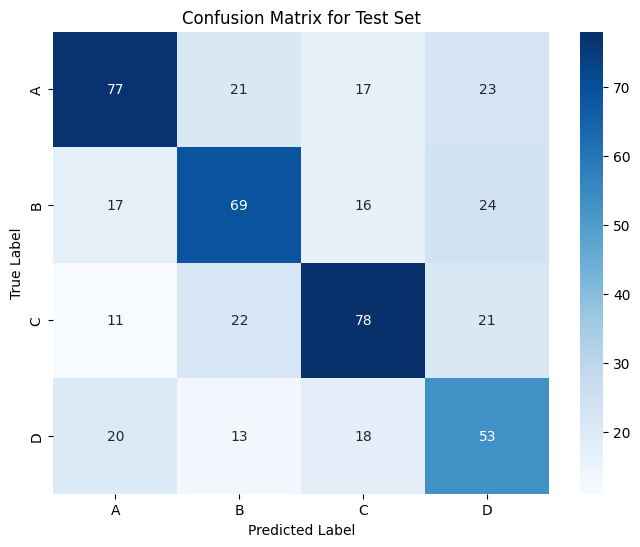

In [14]:
# Map số về chữ
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
test_y_str = [label_map[i] for i in test_y]
test_pred_str = [label_map[i] for i in test_pred]

# Tính confusion matrix
cm = confusion_matrix(test_y_str, test_pred_str, labels=['A', 'B', 'C', 'D'])

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['A', 'B', 'C', 'D'],
            yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()


**DistilBERT baseline**

In [25]:
from transformers import AutoTokenizer, AutoModelForMultipleChoice, TrainingArguments, Trainer
import torch
import json
from datasets import Dataset

# ===== Load OpenBookQA =====
def load_obqa_mc(split):
    path = f"/content/GNP/data/obqa/OpenBookQA-V1-Sep2018/Data/Main/{split}.jsonl"
    label_map = {"A":0,"B":1,"C":2,"D":3}
    data = {"input": [], "label": []}
    with open(path, "r") as f:
        for line in f:
            item = json.loads(line)
            q = item["question"]["stem"]
            choices = item["question"]["choices"]
            label = label_map[item["answerKey"]]
            inputs = [q + " " + c["text"] for c in choices]
            data["input"].append(inputs)
            data["label"].append(label)
    return Dataset.from_dict(data)

train_ds = load_obqa_mc("train")
val_ds   = load_obqa_mc("dev")

# ===== Tokenizer =====
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess(examples):
    all_input_ids = []
    all_attention_mask = []

    for question_choices in examples["input"]:
        # Tokenize each set of choices independently
        tokenized_output = tokenizer(question_choices, padding="max_length", truncation=True, max_length=128, return_tensors="pt")
        all_input_ids.append(tokenized_output["input_ids"])
        all_attention_mask.append(tokenized_output["attention_mask"])

    # Stack the results to form (batch_size, num_choices, sequence_length)
    input_ids_stacked = torch.stack(all_input_ids)
    attention_mask_stacked = torch.stack(all_attention_mask)

    tokenized_inputs = {
        "input_ids": input_ids_stacked,
        "attention_mask": attention_mask_stacked,
        "labels": torch.tensor(examples["label"])
    }
    return tokenized_inputs

train_ds = train_ds.map(preprocess, batched=True, remove_columns=train_ds.column_names)
val_ds   = val_ds.map(preprocess, batched=True, remove_columns=val_ds.column_names)

# ===== Model =====
model = AutoModelForMultipleChoice.from_pretrained("distilbert-base-uncased")

# ===== Training =====
args = TrainingArguments(
    output_dir="./results_distilbert",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to=[] # Disable Weights & Biases logging
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
)

trainer.train()
trainer.evaluate()

# Get predictions and true labels for validation set
val_predictions = trainer.predict(val_ds)
val_pred = val_predictions.predictions.argmax(axis=1)
val_y = val_ds["labels"]

# Load and preprocess the test set for predictions
test_ds = load_obqa_mc("test") # Assuming 'test' split exists
test_ds = test_ds.map(preprocess, batched=True, remove_columns=test_ds.column_names)
test_predictions = trainer.predict(test_ds)
test_pred = test_predictions.predictions.argmax(axis=1)
test_y = test_ds["labels"]


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/4957 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForMultipleChoice were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2888709370.py:66: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,1.172300,1.143467
2,0.898300,1.204013
3,0.676000,1.277105


{'eval_loss': 1.2771046161651611,
 'eval_runtime': 1.8212,
 'eval_samples_per_second': 274.549,
 'eval_steps_per_second': 34.593,
 'epoch': 3.0}

In [26]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print("\n--- Validation Set Metrics ---")
print(f"Validation Precision: {precision_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation Recall: {recall_score(val_y, val_pred, average='weighted'):.4f}")
print(f"Validation F1-score: {f1_score(val_y, val_pred, average='weighted'):.4f}")
print("\nValidation Classification Report:")
print(classification_report(val_y, val_pred))

print("\n--- Test Set Metrics ---")
print(f"Test Precision: {precision_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(test_y, test_pred, average='weighted'):.4f}")
print(f"Test F1-score: {f1_score(test_y, test_pred, average='weighted'):.4f}")
print("\nTest Classification Report:")
print(classification_report(test_y, test_pred))


--- Validation Set Metrics ---
Validation Precision: 0.2660
Validation Recall: 0.2640
Validation F1-score: 0.2646

Validation Classification Report:
              precision    recall  f1-score   support

           A       0.23      0.26      0.25       126
           B       0.30      0.28      0.29       138
           C       0.23      0.23      0.23       110
           D       0.29      0.29      0.29       126

    accuracy                           0.26       500
   macro avg       0.26      0.26      0.26       500
weighted avg       0.27      0.26      0.26       500


--- Test Set Metrics ---
Test Precision: 0.2574
Test Recall: 0.2540
Test F1-score: 0.2546

Test Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.28      0.27       138
           B       0.22      0.21      0.22       126
           C       0.31      0.26      0.28       132
           D       0.23      0.27      0.25       104

    accuracy           

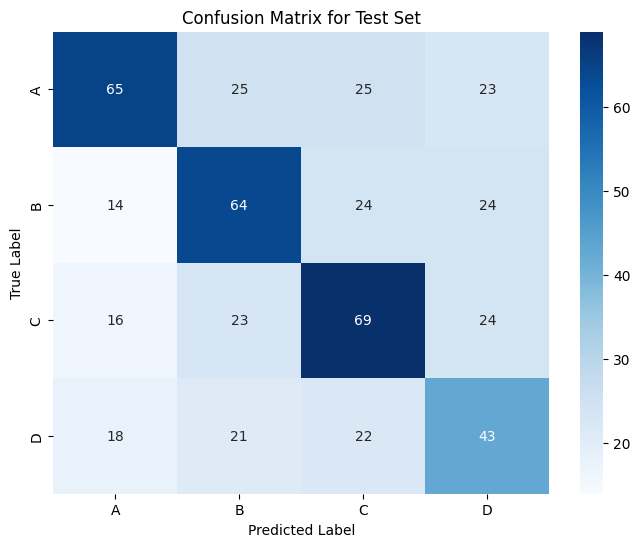

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Map số về chữ
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
test_y_str = [label_map[i] for i in test_y] # Corrected: Removed .item() as 'i' is already an int
test_pred_str = [label_map[i] for i in test_pred]

# Calculate confusion matrix for the test set
cm = confusion_matrix(test_y_str, test_pred_str, labels=['A', 'B', 'C', 'D'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()